In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [2]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Основные статистики

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
list_for_box=hr.describe().columns.values.tolist()

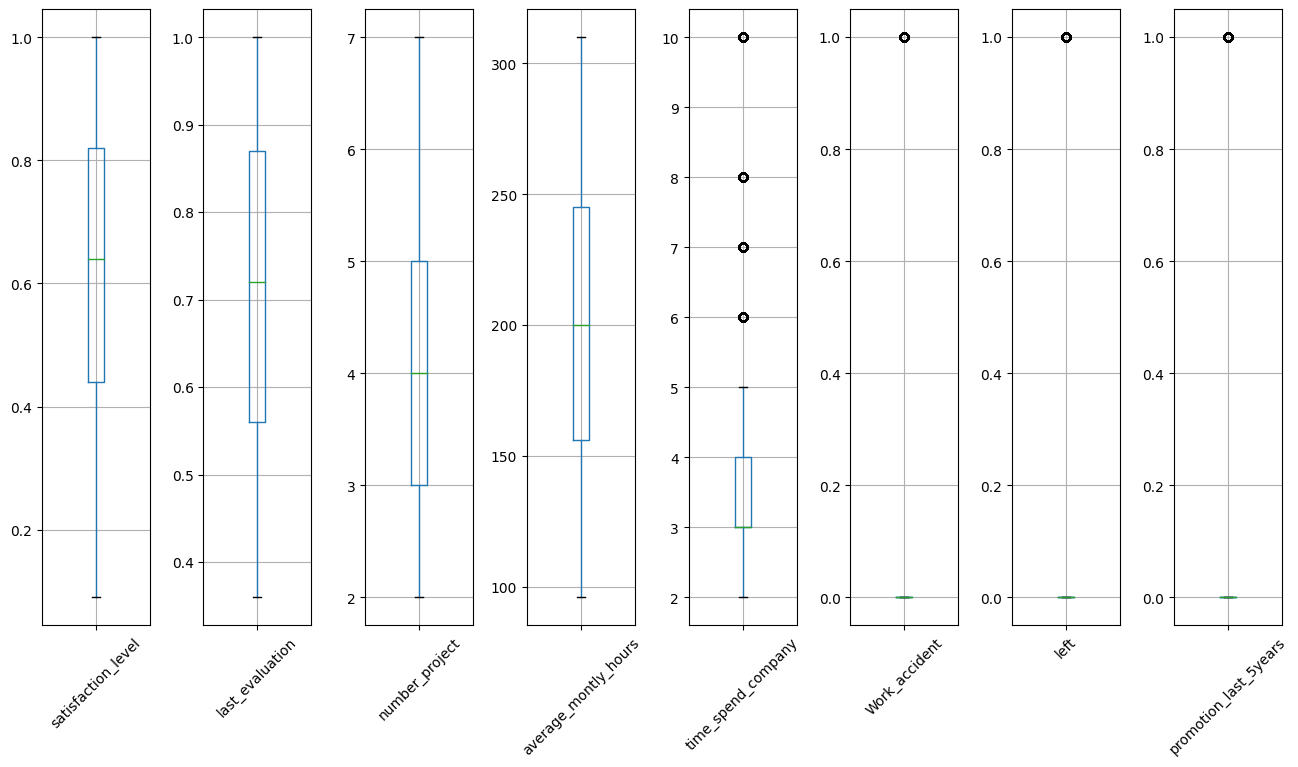

In [6]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.5) #, hspace=0.5

for i in range(len(list_for_box)):
  pylab.subplot(1,len(list_for_box), i+1)
  hr.boxplot(list_for_box[i])
  plt.xticks(rotation=45)

так как 'Work_accident', 'left','promotion_last_5years' - категориальные признаки, для них и остальных категорий выведем моду и уникальные значения

In [7]:
categorial = ['Work_accident', 'left','promotion_last_5years','department','salary']
for i in categorial:
  print(f"{i}\nmode {hr[i].mode()[0]}")
  print(f"unique {hr[i].unique()}")
  print(f"value_counts\n{hr[i].value_counts()}\n")


Work_accident
mode 0
unique [0 1]
value_counts
0    12830
1     2169
Name: Work_accident, dtype: int64

left
mode 0
unique [1 0]
value_counts
0    11428
1     3571
Name: left, dtype: int64

promotion_last_5years
mode 0
unique [0 1]
value_counts
0    14680
1      319
Name: promotion_last_5years, dtype: int64

department
mode sales
unique ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
value_counts
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

salary
mode low
unique ['low' 'medium' 'high']
value_counts
low       7316
medium    6446
high      1237
Name: salary, dtype: int64



In [8]:
dict_check = {'Work_accident': 'Инцедентов на рабочем месте: ', 'left': 'Уволилось сотрудников: ','promotion_last_5years': 'Повышений за последние 5 лет: '}
for i, k in dict_check.items():
  print(k, hr[hr[i]==1].salary.count())

Инцедентов на рабочем месте:  2169
Уволилось сотрудников:  3571
Повышений за последние 5 лет:  319


In [9]:
print("Уволилось после инцендентов: ", hr[(hr['Work_accident']==1)&(hr['left']==1)].salary.count())
print("Уволилось после повышения: ", hr[(hr['left']==1)&(hr['promotion_last_5years']==1)].salary.count())
print("Собрали комбо: ",hr[(hr['left']==1)&(hr['promotion_last_5years']==1)&(hr['Work_accident']==1)].salary.count() )

Уволилось после инцендентов:  169
Уволилось после повышения:  19
Собрали комбо:  4


# Рассчитать и визуализировать корреляционную матрицу

<ipython-input-10-48cbf47ea799>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr().round(4), annot=True, cmap = 'seismic')


<Axes: >

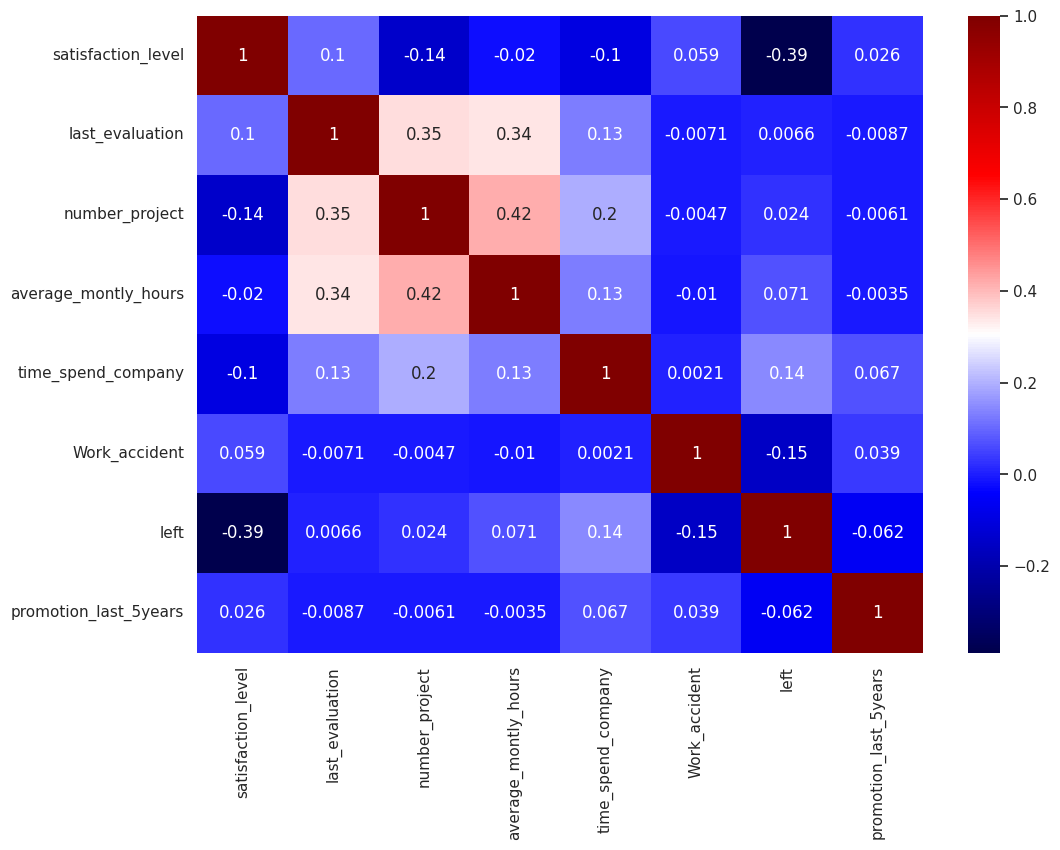

In [10]:
# строим тепловую карту для  коэф. корреляции Пирсона
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hr.corr().round(4), annot=True, cmap = 'seismic')

<ipython-input-11-b666c9b02c7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(hr.corr())
<ipython-input-11-b666c9b02c7c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr(method='spearman').round(4), annot=True, cmap = 'seismic', vmin=-0.4, vmax=0.4, center= 0, mask=matrix)


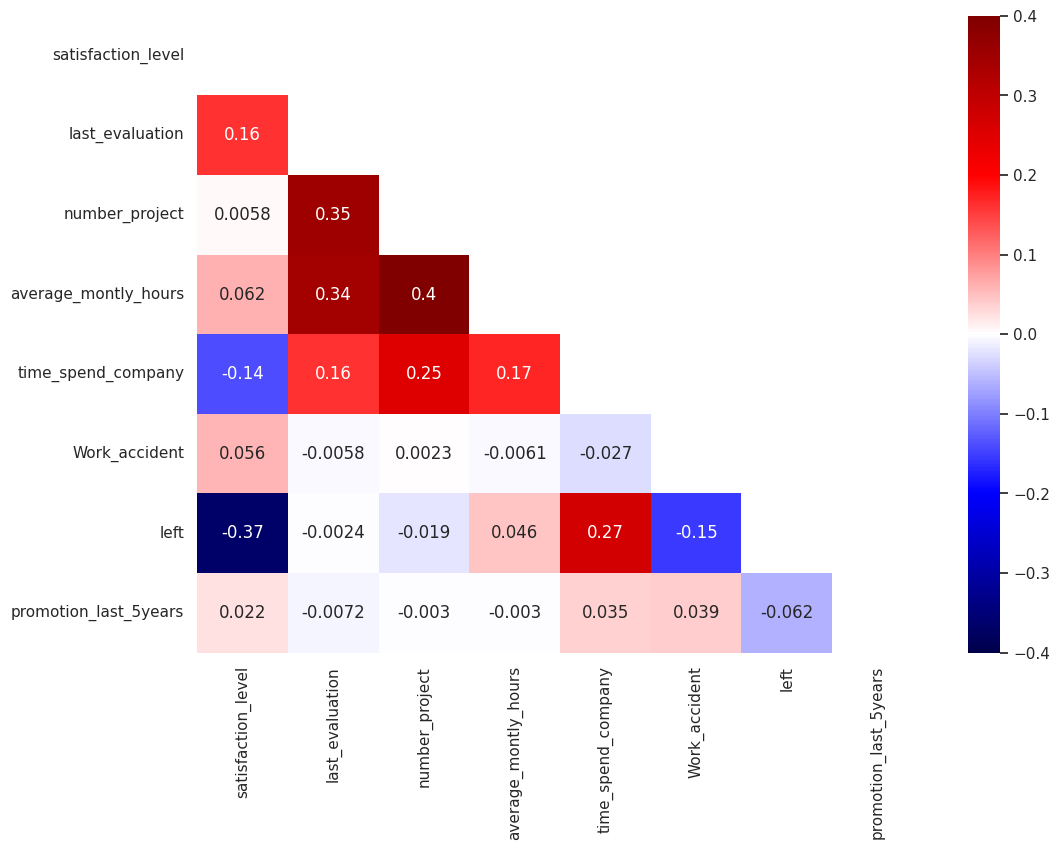

In [11]:
# строим тепловую карту для  коэф. корреляции Спирмана
matrix = np.triu(hr.corr())
sns.set(rc={'figure.figsize':(11.7,8.27), 'axes.facecolor':'white'})
sns.heatmap(hr.corr(method='spearman').round(4), annot=True, cmap = 'seismic', vmin=-0.4, vmax=0.4, center= 0, mask=matrix)
plt.grid(visible=None)

Наибольший коэффициент корреляции: между часами на работе в месяц и количеством сделанных проектов


Наименьший коэффициент корреляции: количеством сделанных проектов и инцендентами на работе

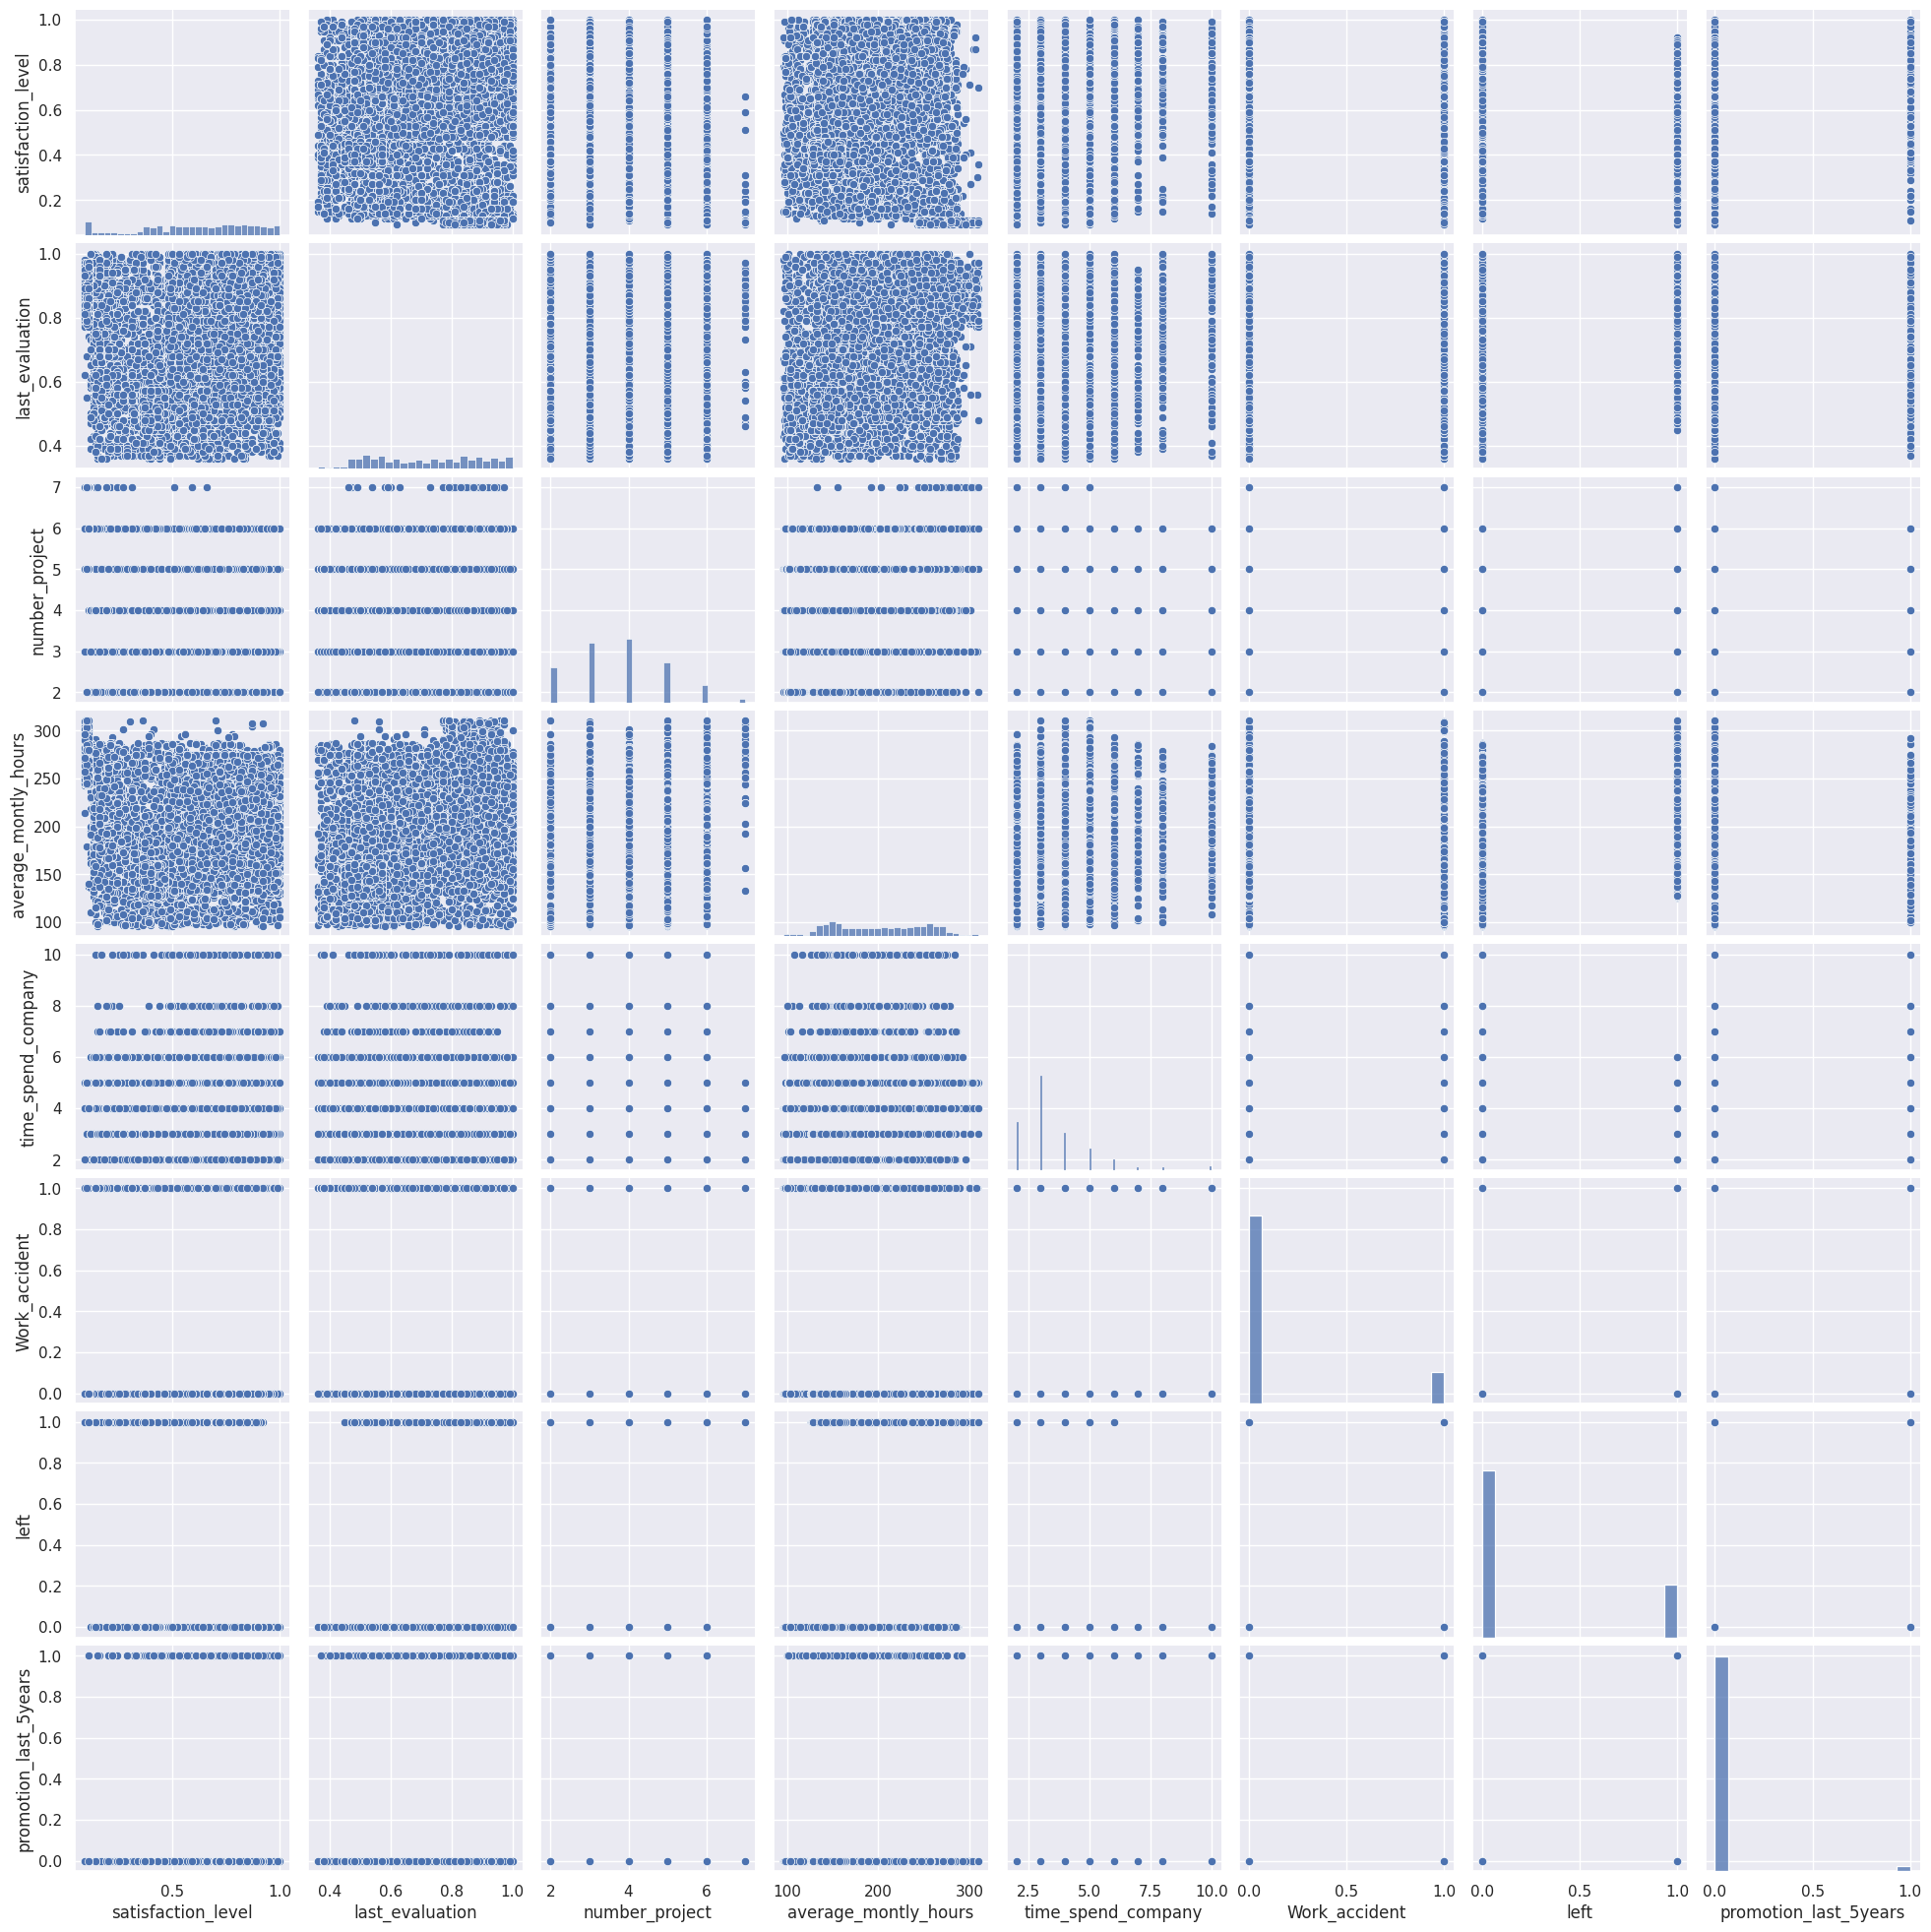

In [51]:
sns.pairplot(hr)

# Сколько сотрудников работает в каждом департаменте

In [12]:
print('Количество сотрудников работающих сейчас в департаменте \n')
print("%-15s %-25s %s" %("Департамент", "Было (учет уволившихся)", "Работает сейчас"), '\n')
for i in hr['department'].unique():
   print("%-15s %-25s %s" %(i, hr[(hr.department==i)].salary.count(), hr[(hr.department==i)&(hr.left==0)].salary.count()))

Количество сотрудников работающих сейчас в департаменте 

Департамент     Было (учет уволившихся)   Работает сейчас 

sales           4140                      3126
accounting      767                       563
hr              739                       524
technical       2720                      2023
support         2229                      1674
management      630                       539
IT              1227                      954
product_mng     902                       704
marketing       858                       655
RandD           787                       666


# Показать распределение

In [13]:
def for_bar(col):
  x=list()
  y=list()
  for i in hr[col].unique():
    x.append(i)
    y.append(hr[hr[col]==i][col].count())

  return x, y

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

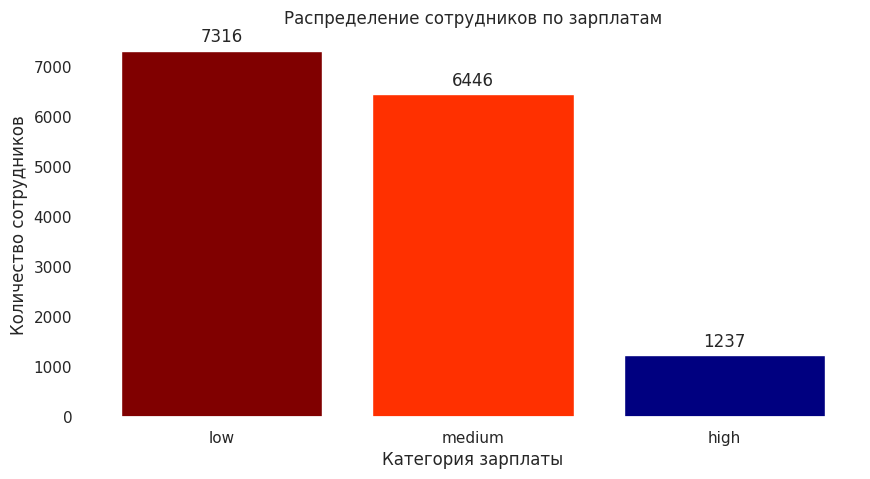

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

my_cmap = plt.get_cmap("jet")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
autolabel(plt.bar(for_bar('salary')[0], for_bar('salary')[1], color=my_cmap(rescale(for_bar('salary')[1]))), ax)
plt.xlabel("Категория зарплаты")
plt.ylabel("Количество сотрудников")
plt.title("Распределение сотрудников по зарплатам")

In [15]:
dict_dep = dict()
for k in range(len(hr['department'].unique())):
  x=list()
  y=list()
  for i in hr['salary'].unique():
    x.append(i)
    y.append(hr[(hr['salary']==i)&(hr['department']==hr['department'].unique()[k])]['salary'].count())
  dict_dep[hr['department'].unique()[k]] = [x,y, k]


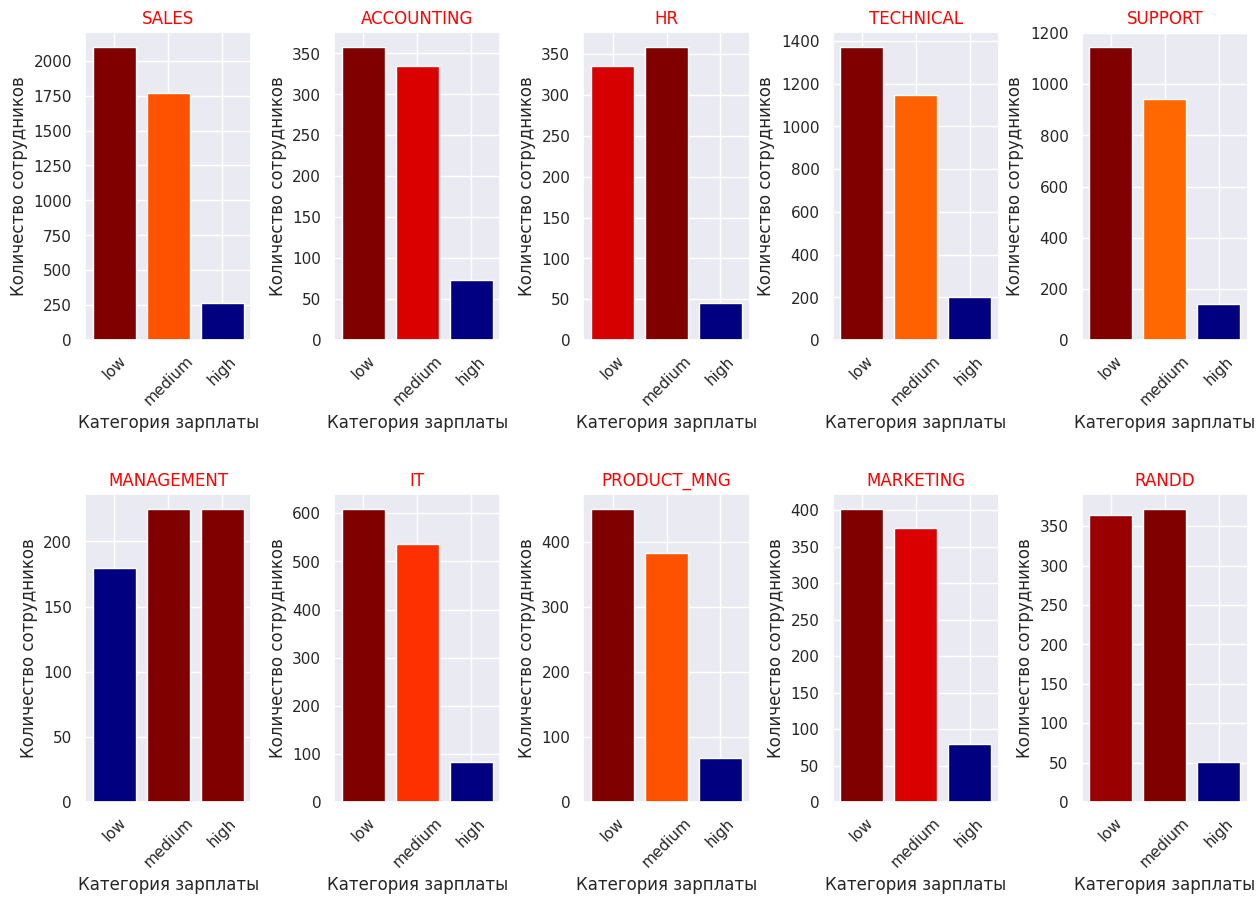

In [56]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5) #

for dep, value in dict_dep.items():
  pylab.subplot(2,5, value[2]+1)
  plt.bar(value[0], value[1], color=my_cmap(rescale(value[1])))
  plt.xlabel("Категория зарплаты")
  plt.ylabel("Количество сотрудников")
  plt.title(dep.upper(), color = 'Red')
  plt.xticks(rotation=45)

# Проверить гипотезу

сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [17]:
#Нулевая гипотеза: сотрудники с высокой зп и сотрудники с низкой зп проводят одинаковое время на работе
high = hr[(hr['salary']=='high')]['average_montly_hours']
low =  hr[(hr['salary']=='low')]['average_montly_hours']

In [18]:
print(len(low),len(high))

7316 1237


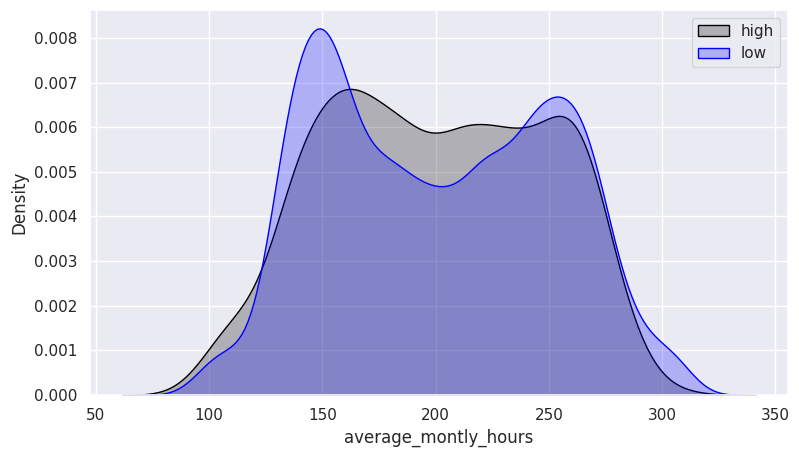

In [19]:
sns.set(rc={'figure.figsize':(9,5)})
sns.kdeplot(high, label="high", fill = True, color = 'black')
sns.kdeplot(low, label="low", fill = True, color = 'blue')
plt.legend()
plt.show()

In [20]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [21]:
list_AB = [low, high]
for i in list_AB:
  stat, p = stats.shapiro(i)

  print(f'stat = {stat:.3f}, p = {p:.5f}')
  if p > 0.05:
    print('Вероятно нормальное распределение')
  else:
    print('Вероятно не нормальное распределение')

stat = 0.960, p = 0.00000
Вероятно не нормальное распределение
stat = 0.971, p = 0.00000
Вероятно не нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Так как распределения ненормальные используем непараметрический тест

In [22]:
stat, p = stats.mannwhitneyu(low, high)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Отклоняем гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

# Рассчитать показатели

In [23]:
print(f"Средняя степень удовлетворенности для уволившихся {hr[hr['left']==1]['satisfaction_level'].mean().round(3)}")
print(f"Средняя степень удовлетворенности для НЕ уволившихся {hr[hr['left']==0]['satisfaction_level'].mean().round(3)}")

Средняя степень удовлетворенности для уволившихся 0.44
Средняя степень удовлетворенности для НЕ уволившихся 0.667


In [24]:
print(f"Среднее количество проектов для уволившихся {hr[hr['left']==1]['number_project'].mean().round(1)}")
print(f"Среднее количество проектов для НЕ уволившихся {hr[hr['left']==0]['number_project'].mean().round(1)}")

Среднее количество проектов для уволившихся 3.9
Среднее количество проектов для НЕ уволившихся 3.8


In [25]:
print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся {round(hr[(hr['left']==1)&(hr['promotion_last_5years']==1)]['left'].count() / hr[(hr['left']==1)]['left'].count()*100, 2)} %")
print(f"Доля сотрудников с повышением за последние 5 лет среди НЕ уволившихся {round(hr[(hr['left']==0)&(hr['promotion_last_5years']==1)]['left'].count() / hr[(hr['left']==0)]['left'].count()*100, 2)} %")

Доля сотрудников с повышением за последние 5 лет среди уволившихся 0.53 %
Доля сотрудников с повышением за последние 5 лет среди НЕ уволившихся 2.63 %


# Модель LDA

In [26]:
date = hr[list_for_box].drop(labels='left', axis=1)
Y=hr['left']

In [27]:
Y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(date, Y, test_size=0.20, random_state=42, stratify=Y)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
lda = LinearDiscriminantAnalysis()

In [32]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [33]:
pr = lda.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [35]:
y_test.value_counts()

0    2286
1     714
Name: left, dtype: int64

In [36]:
report = classification_report(y_test, pr)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2286
           1       0.52      0.26      0.35       714

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000



In [37]:
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1], pos_label=1)

Видно, что модель более склонна к классу большинства.
Попробуем сбалансировать распределение классов путём случайного исключения наблюдений с помощью метода NearMiss

In [38]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [39]:
X_train_miss, Y_train_miss = nm.fit_resample(X_train, y_train.ravel())

pd.DataFrame(Y_train_miss).value_counts()

0    2857
1    2857
dtype: int64

In [40]:
lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_train_miss, Y_train_miss.ravel())
prediction = lda2.predict(X_test)

In [41]:
print('\t\t БЫЛО \n')
print(report)
print('\t\t СТАЛО \n')
print(classification_report(y_test, prediction))

		 БЫЛО 

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2286
           1       0.52      0.26      0.35       714

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000

		 СТАЛО 

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2286
           1       0.52      0.81      0.63       714

    accuracy                           0.78      3000
   macro avg       0.72      0.79      0.74      3000
weighted avg       0.83      0.78      0.79      3000



Значение отзывов меньшинства повысилось с 26% до 81%, но отзывы большиста снизились с 92% до 77%

Text(0.5, 1.0, 'ROC curve')

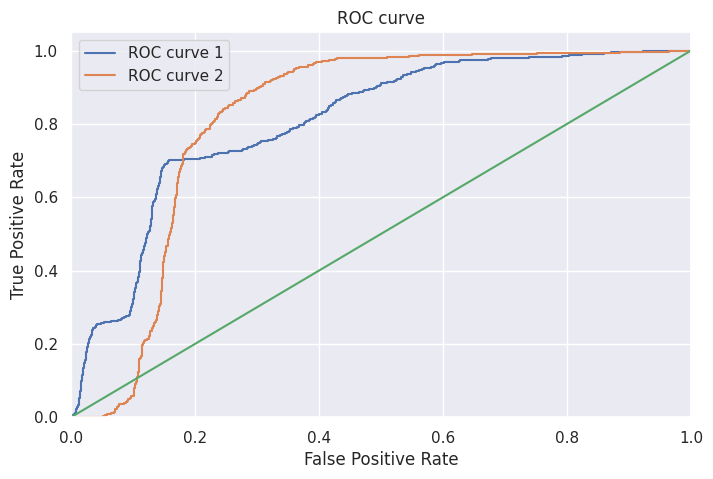

In [42]:
plt.figure(figsize=(8, 5))
fpr1, tpr1, thresholds1 = roc_curve(y_test, lda2.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr, tpr,  label='ROC curve 1')
plt.plot(fpr1, tpr1,  label='ROC curve 2')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')

In [43]:
auc1 = roc_auc_score(y_test, pr)
auc2 = roc_auc_score(y_test, prediction)
print('AUC ROC 1 ', round(auc1,2), '\nAUC ROC 2 ', round(auc2,2))

AUC ROC 1  0.59 
AUC ROC 2  0.79


выбираем вторую модель, так как площадь под ROC-кривой второй модели больше  